In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn

The above cell calls all the universal imports used in the project 

In [2]:
df = pd.read_csv('D:\DS-Nick-brown\Final-Project\Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


This Cell is used to import the dataset as the dataframe object df given in the picture 

In [3]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [4]:
#checking null values
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
#As in the above we can see that the null values occur for salary
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

gender            2
ssc_b             2
hsc_b             2
hsc_s             3
degree_t          3
workex            2
specialisation    2
status            2
dtype: int64

In [6]:
df.drop(columns='sl_no', inplace=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

salary    31.162791
dtype: float64

In [8]:
# fill null value in 'salary' column with median because the outlier is pretty ba
df['salary'] = df['salary'].fillna(df['salary'].mean())
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


In [9]:
#Check missing value (# This proves that all the salary null values have been operated)
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

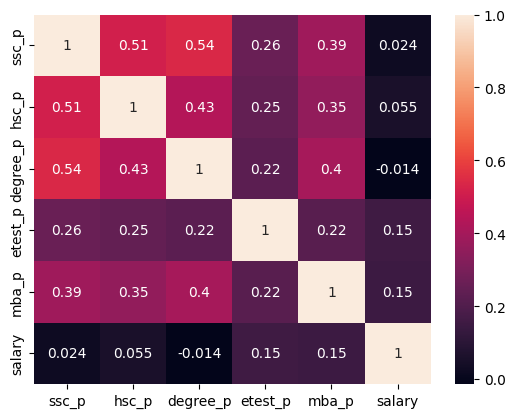

In [10]:
sn.heatmap(data = df.select_dtypes(exclude='object').corr(), annot=True)
plt.show()

In [53]:
#Check for outliers , Boxplot for checking the outliers
# Check for Outliers

Numerical_cols = df.select_dtypes(exclude='object')
Categorical_cols = df.select_dtypes(include = 'object')

In [12]:
Numerical_cols
#We are segregating Numerical and Categorical columns by using the keyword object

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.000000
1,79.33,78.33,77.48,86.5,66.28,200000.000000
2,65.00,68.00,64.00,75.0,57.80,250000.000000
3,56.00,52.00,52.00,66.0,59.43,288655.405405
4,85.80,73.60,73.30,96.8,55.50,425000.000000
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.000000
211,58.00,60.00,72.00,74.0,53.62,275000.000000
212,67.00,67.00,73.00,59.0,69.72,295000.000000
213,74.00,66.00,58.00,70.0,60.23,204000.000000


In [13]:
Categorical_cols

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
210,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


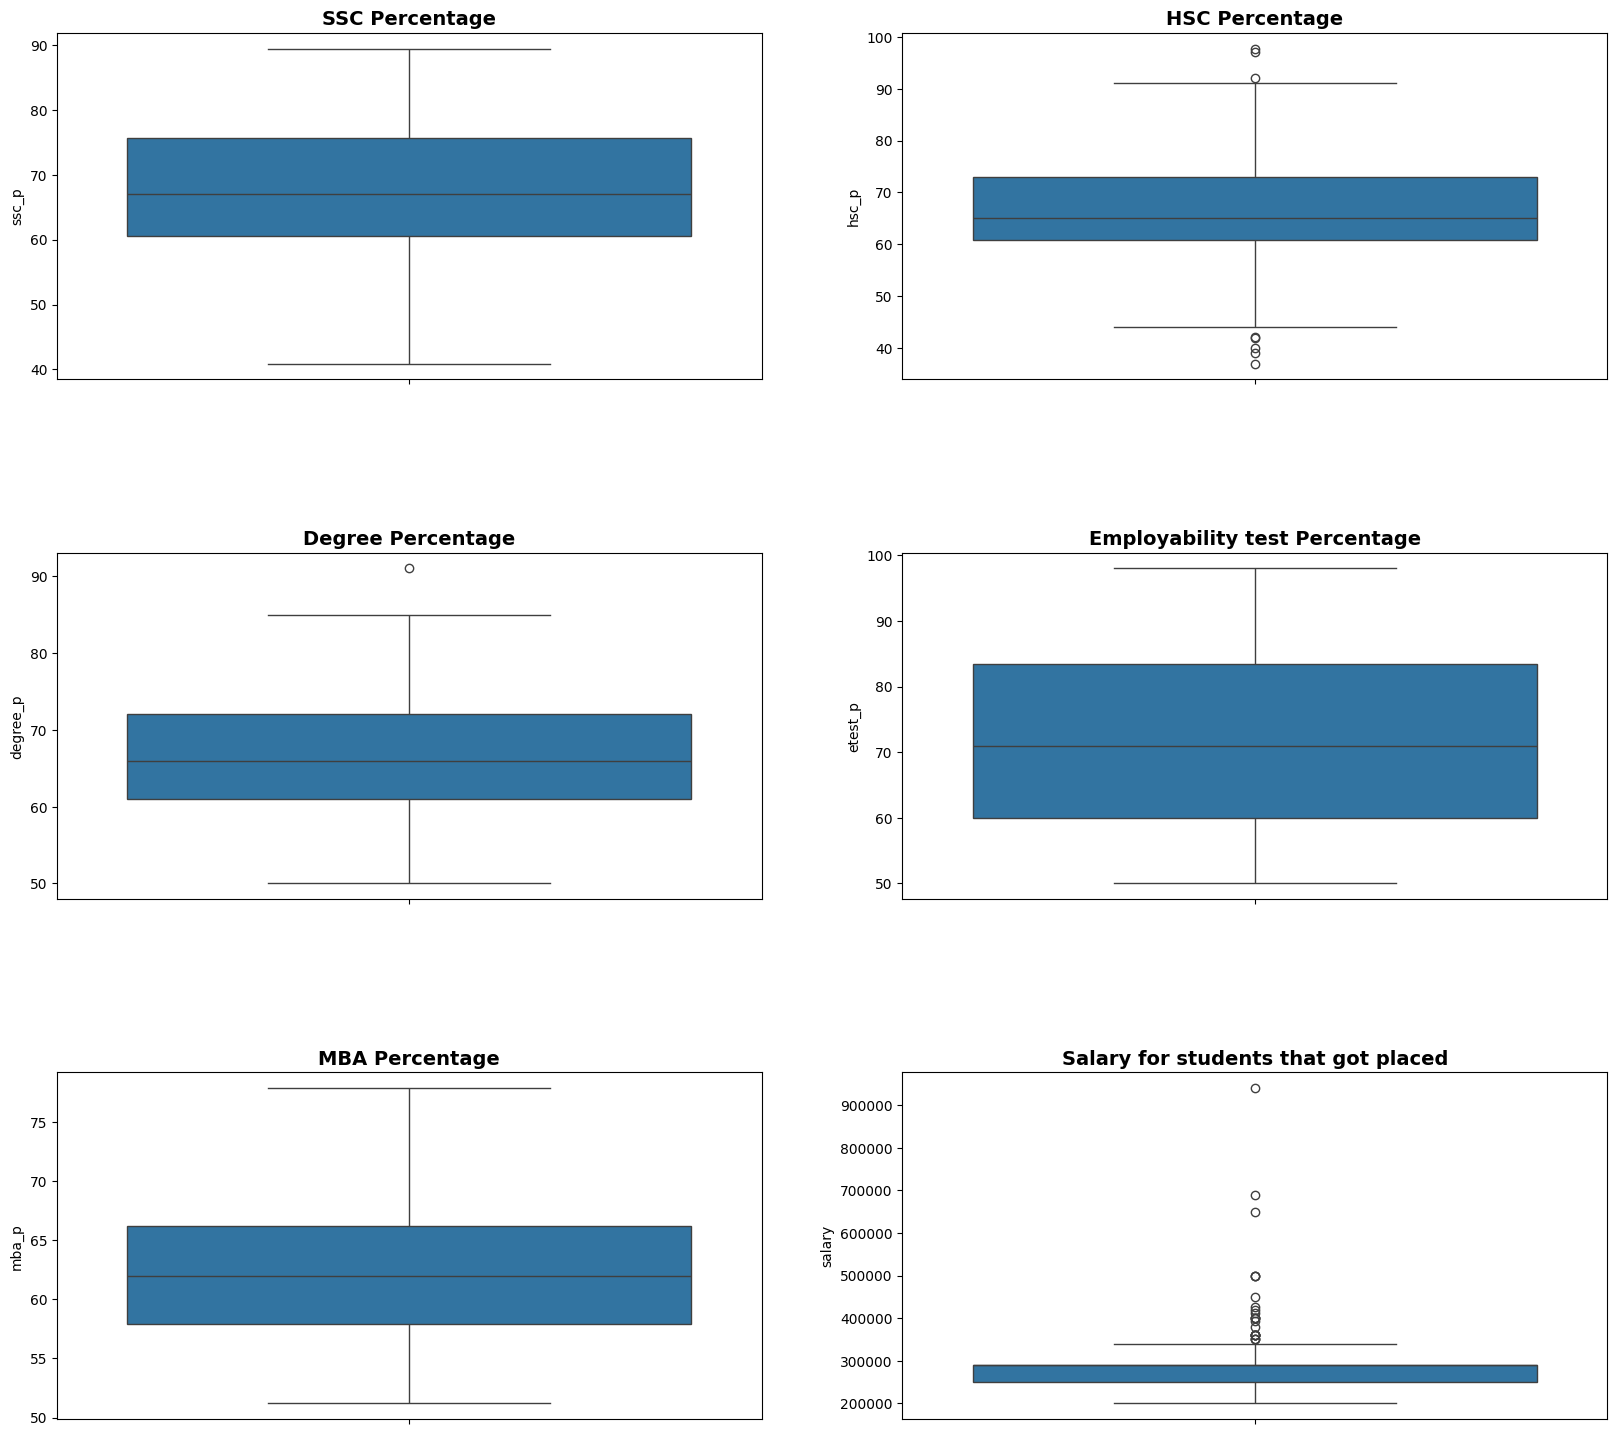

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,18))
fig.subplots_adjust(hspace=0.5)
sn.boxplot(df['ssc_p'], ax=axes[0,0]).set_title('SSC Percentage', fontweight='bold', fontsize=14)
sn.boxplot(df['hsc_p'], ax=axes[0,1]).set_title('HSC Percentage',fontweight='bold',fontsize=14)
sn.boxplot(df['degree_p'], ax=axes[1,0]).set_title('Degree Percentage',fontweight='bold',fontsize=14)
sn.boxplot(df['etest_p'], ax=axes[1,1]).set_title('Employability test Percentage',fontweight='bold',fontsize=14)
sn.boxplot(df['mba_p'], ax=axes[2,0]).set_title('MBA Percentage',fontweight='bold',fontsize=14)
sn.boxplot(df['salary'], ax=axes[2,1]).set_title('Salary for students that got placed',fontweight='bold',fontsize=14)
plt.show()


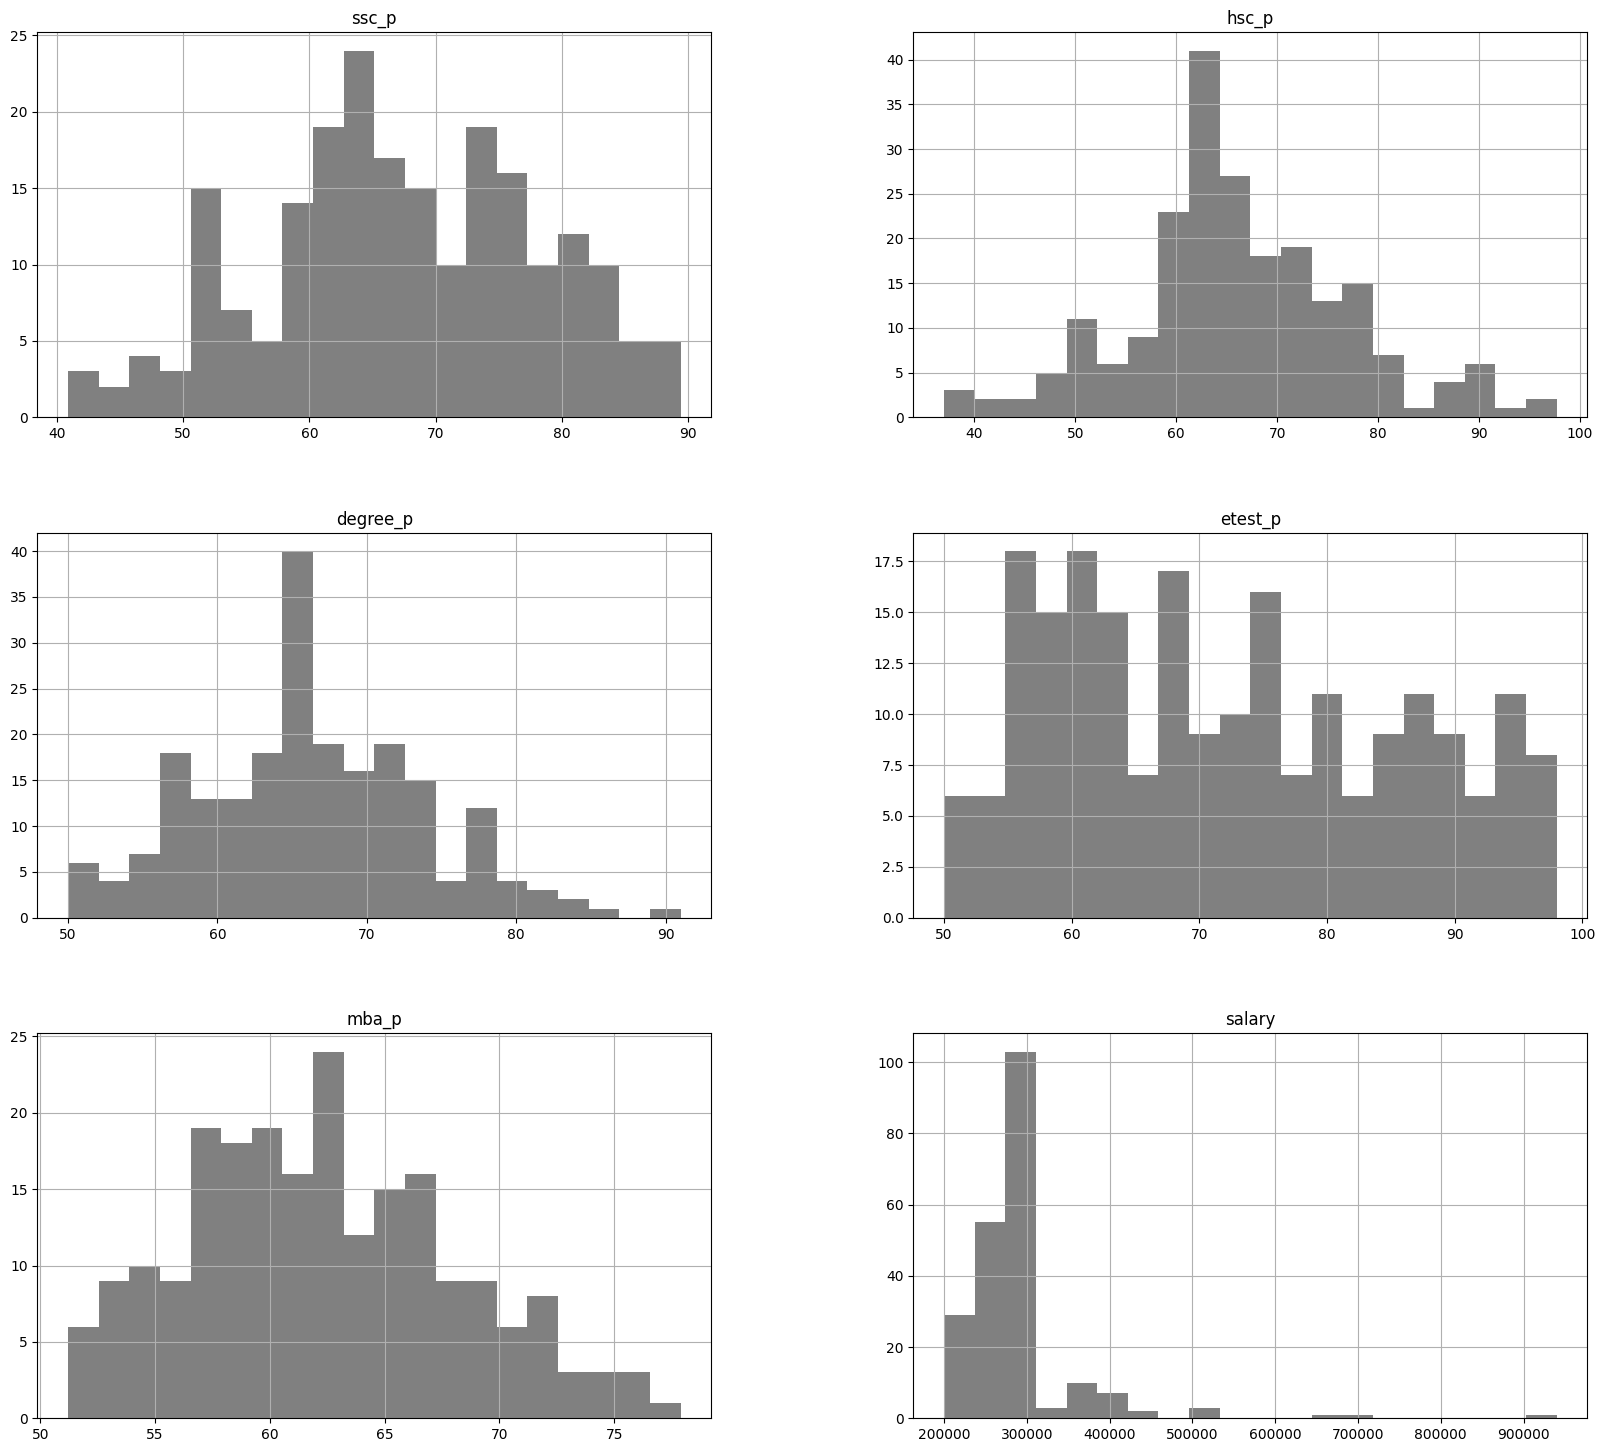

In [15]:
df.hist(figsize=(20,18), bins=20, color='grey')
plt.show()

In [16]:
# Adding the status variable in numerical format for better visualization
#Dependent variable
df['Status'] = df['status'].replace({'Placed': 1, 'Not Placed' : 0})

<Figure size 1200x1000 with 0 Axes>

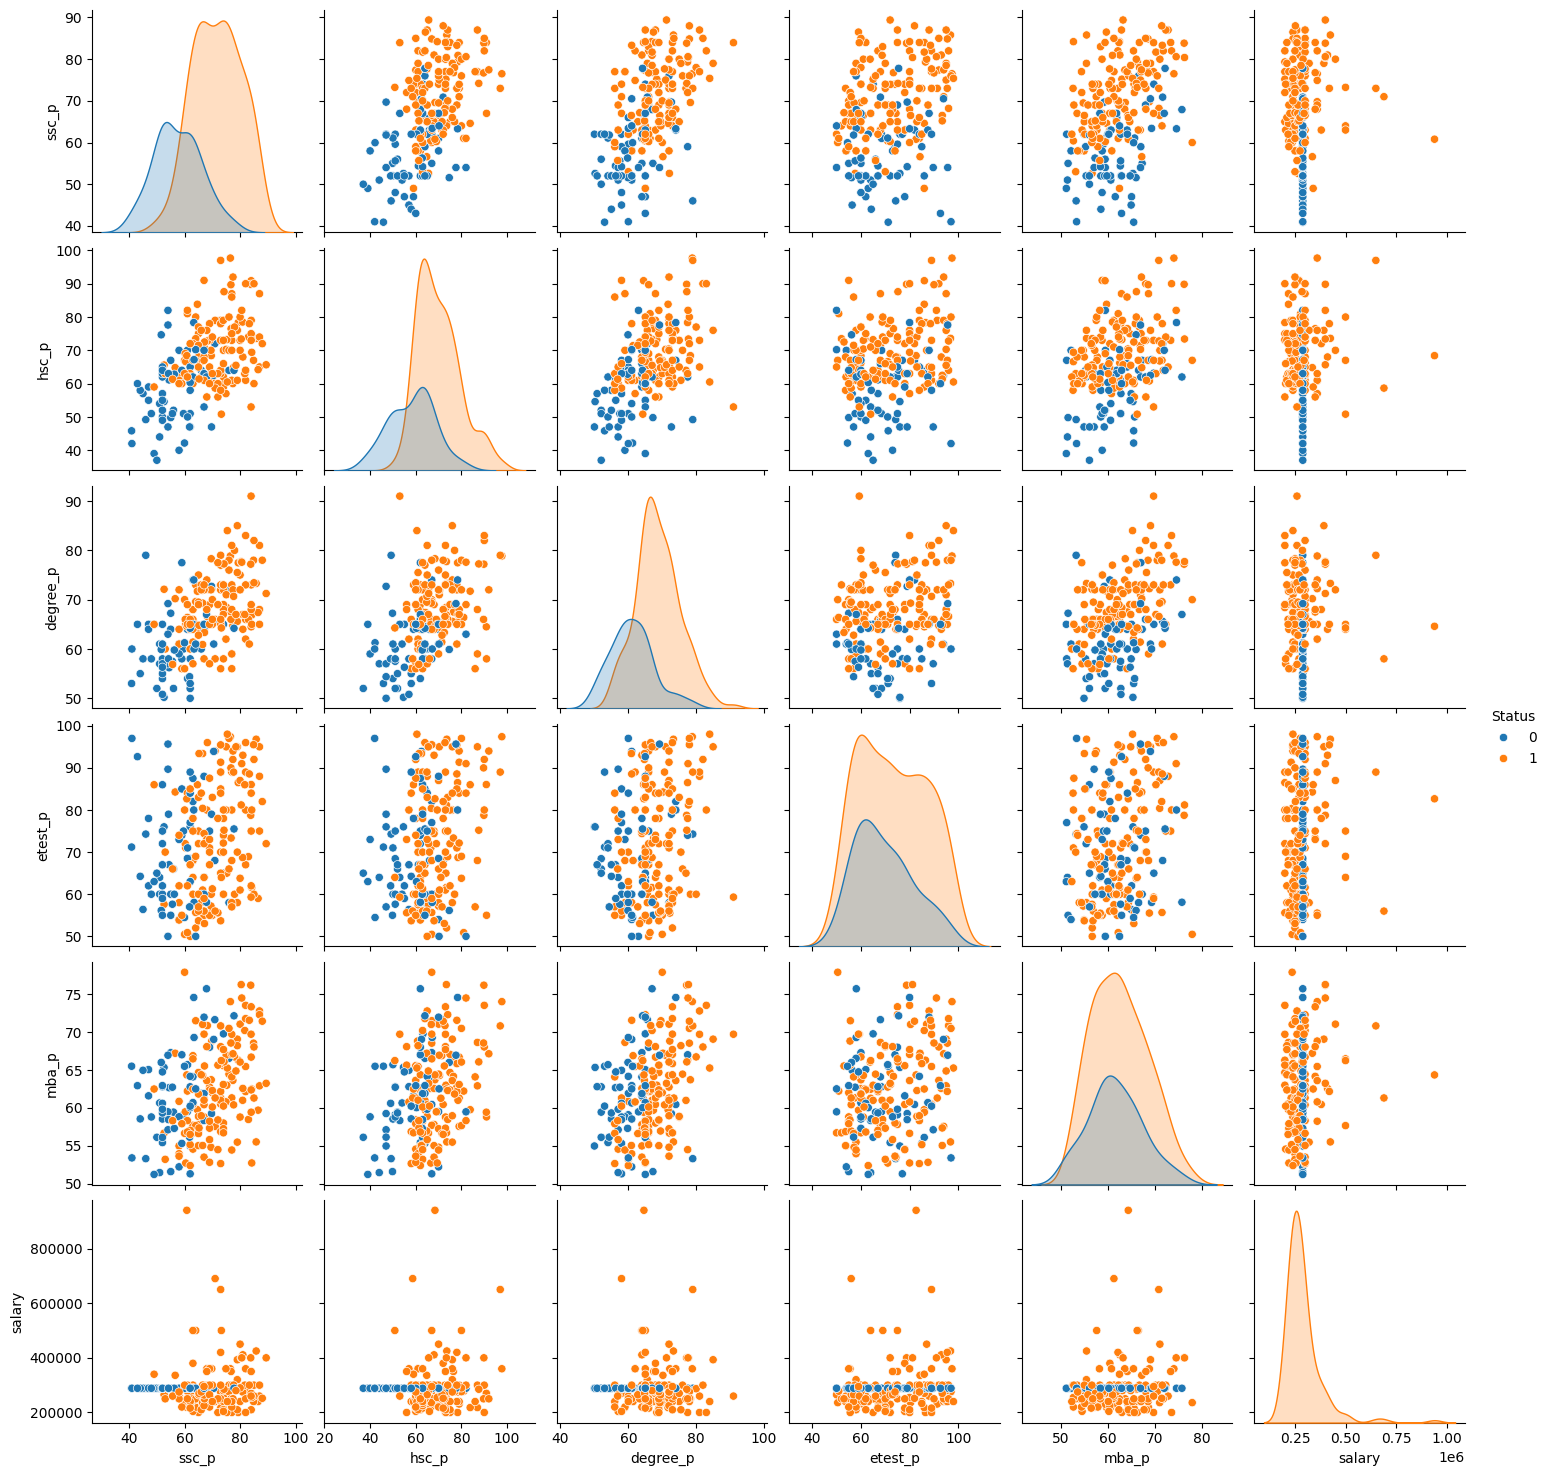

In [17]:
plt.figure(figsize=(12,10))
sn.pairplot(data=df, hue='Status')
plt.show()

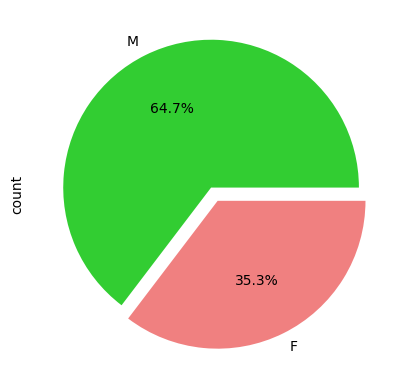

In [18]:
# Gender Distribution
#Gender distribution plot shows the total distribution of men and women over the entire dataset
df['gender'].value_counts().plot(kind='pie', autopct='%0.1f%%', explode=(0.05,0.05), colors=['limegreen','lightcoral'])
plt.show()

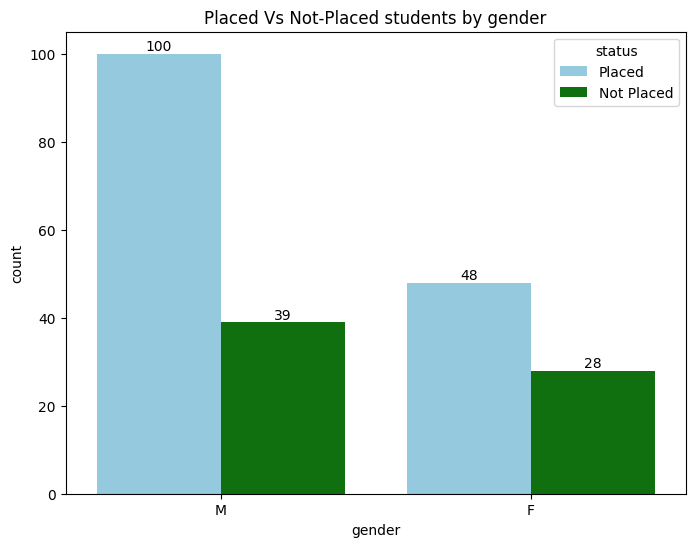

In [19]:
plt.figure(figsize=(8,6)) #Plot setting
#Analytics part
ax = sn.countplot(data=df, x= df['gender'], hue=df['status'], palette=['skyblue','green'])
for i in ax.containers:
    ax.bar_label(i)
plt.title('Placed Vs Not-Placed students by gender') 
plt.show()    

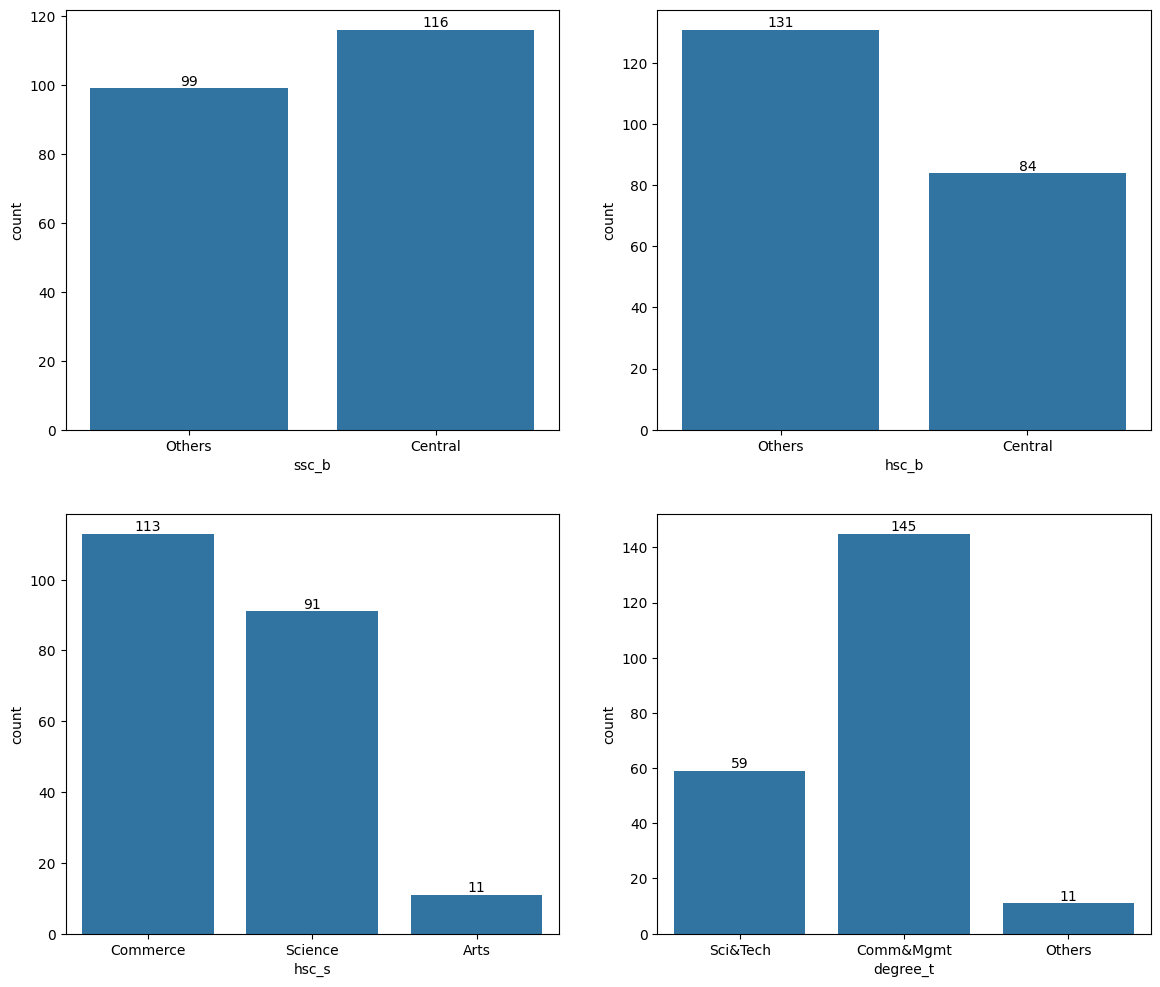

In [20]:
fig,axes = plt.subplots(nrows= 2, ncols=2, figsize=(14,12))
ax=sn.countplot(x=df['ssc_b'], ax=axes[0,0])
for i in ax.containers:
    ax.bar_label(i)
ax1=sn.countplot(x=df['hsc_b'], ax=axes[0,1])
for i in ax1.containers:
    ax1.bar_label(i)
ax2=sn.countplot(x=df['hsc_s'], ax=axes[1,0])
for i in ax2.containers:
    ax2.bar_label(i)
ax3=sn.countplot(x=df['degree_t'], ax=axes[1,1])
for i in ax3.containers:
    ax3.bar_label(i)

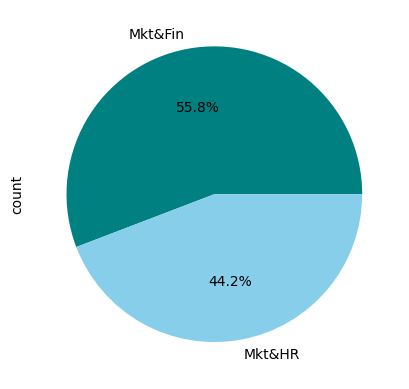

In [21]:
df['specialisation'].value_counts().plot(kind='pie', autopct='%0.1f%%', colors=['teal','skyblue'])
plt.show()
#Analysis on What specialization is famous

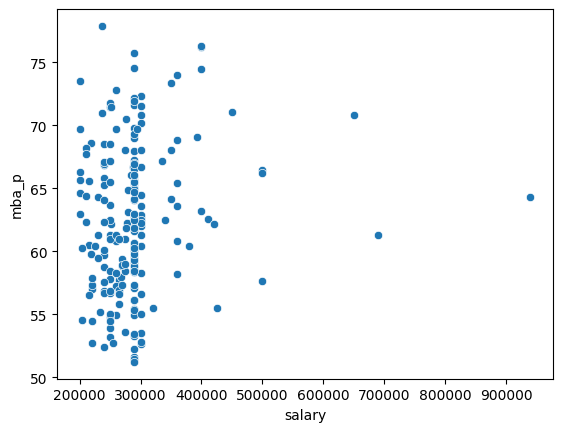

In [22]:
sn.scatterplot(x=df['salary'],y=df['mba_p'])
plt.show()
#mba percentage does not make a great impact!

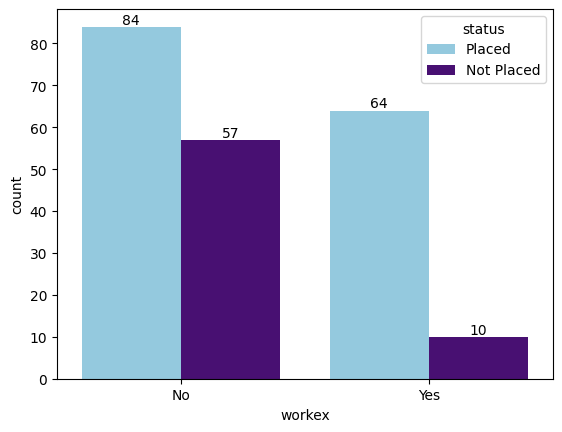

In [23]:
#Relationship between placement status and workexperience
ax = sn.countplot(x=df['workex'], hue=df['status'], palette=['skyblue','indigo'])
for i in ax.containers:
    ax.bar_label(i)

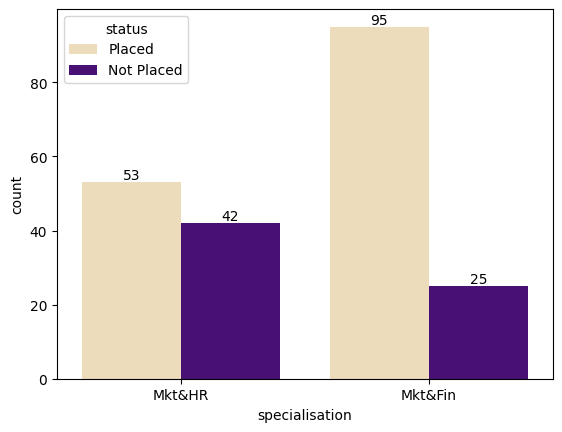

In [24]:
ax = sn.countplot(x=df['specialisation'], hue=df['status'], palette=['wheat','indigo'])
for i in ax.containers:
    ax.bar_label(i)

In [25]:
data = pd.crosstab(df['specialisation'], df['status'])
data['Total'] = data['Placed']+ data['Not Placed'] #Addition to the crosstab data 
data['% of students placed in each specialisation'] = data['Placed']*100/data['Total'] #Calculating the total percentage of people placed
data

status,Not Placed,Placed,Total,% of students placed in each specialisation
specialisation,,,,
Mkt&Fin,25,95,120,79.166667
Mkt&HR,42,53,95,55.789474


In [26]:
pd.crosstab(index=[df['degree_t'], df['specialisation']], columns=df['status'])
#Stastical analysis structure of groupby statement where PK is degree-t and then the substructure is specialisation
#The way it works 
#Indices are units whose values are supposed to be picked in a unit order and columns is the count where the value is embedded at

status                    Not Placed  Placed
degree_t  specialisation                    
Comm&Mgmt Mkt&Fin                 18      68
          Mkt&HR                  25      34
Others    Mkt&Fin                  2       2
          Mkt&HR                   4       3
Sci&Tech  Mkt&Fin                  5      25
          Mkt&HR                  13      16

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ssc_b'] = le.fit_transform(df['ssc_b'])
df['hsc_b'] = le.fit_transform(df['hsc_b'])
df['hsc_s'] = le.fit_transform(df['hsc_s'])
df['degree_t'] = le.fit_transform(df['degree_t'])
df['workex'] = le.fit_transform(df['workex'])
df['specialisation'] = le.fit_transform(df['specialisation'])

In [28]:
# Dropping Salary column as the students who did not get placed have the salary value as Null. 
#This will create bias while model building as it is representing similar information as the Target variable 'status'
new_df = df.drop(['salary','status'], axis=1)
new_df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,Status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1


In [29]:
# Splitting data into Train and Test

from sklearn.model_selection import train_test_split
X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]
X.head()
#What is this cell doing ?
#X is a set of independent variables except last column which is of interest ( Status)
#Y is a set of dependent variables which is predicted by the predictor variables (Status)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


In [30]:
y.head()
#0 represents the entry of not being placed for the corresponding vector
#1 represents the entry of being placed

0    1
1    1
2    1
3    0
4    1
Name: Status, dtype: int64

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=101)
x_train.shape, x_test.shape
# Handling case 1 and handling case 2 where we split the dataset into train and test_set
#We can clearly see that there is an imbalance in the data

((172, 12), (43, 12))

In [32]:
## Model Building
### Logistic Regression without Hyperparameter Tuning
from sklearn.linear_model import LogisticRegression
log_it = LogisticRegression(random_state=32) #constructor invocation happens here and a random_state of 32 is set
log_it.fit(x_train,y_train)

#Initializing logit object to Logistic regression and fitting the data x_train and y_train 
#constructing a logit object with a random state of 32


C:\Users\karthik\anaconda3\envs\Deployment\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=32)

In [33]:
y_pred_train = log_it.predict(x_train)
y_pred_test = log_it.predict(x_test)
# Evaluating on both training set as well as test_set accuracy

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,y_pred_test)
#Accuracy score of test-data

0.8372093023255814

In [35]:
accuracy_score(y_train,y_pred_train)
#This is the accuracy of the training data

0.8895348837209303

In [36]:
# Evaluating Test data 

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.88      0.85      0.87        27

    accuracy                           0.84        43
   macro avg       0.82      0.83      0.83        43
weighted avg       0.84      0.84      0.84        43



In [37]:
confusion_matrix(y_test,y_pred_test)

array([[13,  3],
       [ 4, 23]], dtype=int64)

In [38]:
# Evaluating Train data 
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        51
           1       0.90      0.94      0.92       121

    accuracy                           0.89       172
   macro avg       0.88      0.85      0.86       172
weighted avg       0.89      0.89      0.89       172



In [39]:
from sklearn.model_selection import GridSearchCV
# Specifying the parameters that we want to Hypertune

parameters = {'penalty': ['l1','l2','elasticnet'], 'C': [1,2,3,5,10,20,30,50], 'max_iter': [100,200,300]}
#At this step we use GridSearchCV to extract the best parameters which suits Logistic regression


In [40]:
log_it_grid = GridSearchCV(log_it, param_grid=parameters, scoring = 'accuracy', cv=10)
log_it_grid.fit(x_train,y_train)

C:\Users\karthik\anaconda3\envs\Deployment\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\karthik\anaconda3\envs\Deployment\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=32),
             param_grid={'C': [1, 2, 3, 5, 10, 20, 30, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [41]:
print(log_it_grid.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [42]:
y_pred_grid_test = log_it_grid.predict(x_test)
y_pred_grid_train = log_it_grid.predict(x_train)
accuracy_score(y_test,y_pred_grid_test) # Accuracy score of test data

#Steps followed here:
# 1) Use the existing logit model and feed that model into the GridSearchCV package with the parametric set 
# 2) Now compute the testing accuracy and training accuracy
# 3) Testing accuracy is bumped to 2%

0.8372093023255814

In [43]:
accuracy_score(y_pred_grid_train,y_train)
#There is a minor improvement in the training accuracy as well

0.8895348837209303

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(y_test,y_pred_test)
#Reciever operating curve :- it is a measure of the tradeoff between the true positive rate(TPR) and the false positive rate(FPR) which helps us to
#evaluate a binary classification model

0.8321759259259258

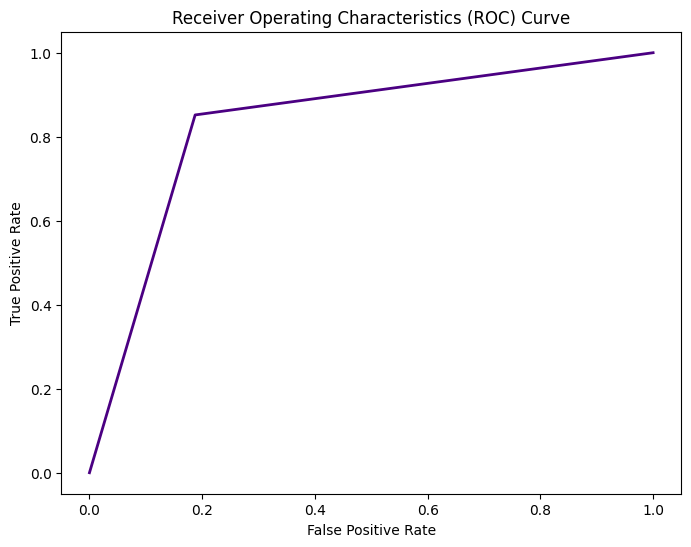

In [45]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_test)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, color='indigo', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.show()

In [46]:
#Here AUC (Area under the curve) represents the degree of seperatibility between the predictor variables and the dependant variable 
# So more the area(here it is around 84%) more is the distinguishing capacity for the model to seperate out between target class and predictor variables


In [47]:
#Model to be Saved is called log_it

In [48]:
import pickle

In [49]:
filename = 'D:/DS-Nick-brown/Final-Project/trained_model.sav'
#This is the file_name where the model is saved 
pickle.dump(log_it_grid,open(filename,'wb'))


In [50]:
#What is happening here is we are declaring a filename variable where we store the saved model
#Triggering this script over and over again will rewrite the saved model file in case of an automation scenario
#Then we go ahead and dump the model onto the location
x_train.head(30)


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
39,1,81.00,1,68.00,1,2,64.00,2,0,93.00,0,62.56
118,1,76.00,0,80.00,0,2,78.00,2,1,97.00,1,70.48
32,0,61.00,0,81.00,0,1,66.40,0,0,50.89,1,62.21
42,1,49.00,1,39.00,0,2,65.00,1,0,63.00,0,51.21
150,1,71.00,0,58.66,0,2,58.00,2,1,56.00,0,61.30
80,0,69.00,1,62.00,1,1,69.00,0,1,67.00,1,62.35
170,0,63.40,1,67.20,1,1,60.00,0,0,58.06,1,69.28
129,1,76.70,0,89.70,1,1,66.00,0,1,90.00,0,68.55
16,1,63.00,0,66.20,0,1,65.60,0,1,60.00,0,62.54
125,0,84.00,0,73.00,0,1,73.00,0,0,75.00,0,73.33


In [51]:

input_data = (1,65.00,1,25,1,1,60,2,0,57.00,0,59.00)

input_numpy = np.asarray(input_data)

input_numpy = input_numpy.reshape(1,-1)

#Reading the saved model

loaded_model = pickle.load(open('D:/DS-Nick-brown/Final-Project/trained_model.sav','rb'))

prediction = loaded_model.predict(input_numpy)

if prediction[0]==0:
    print("You will not be placed")
else:
    print("You will be placed")



You will not be placed


C:\Users\karthik\anaconda3\envs\Deployment\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [52]:
#This is a complete software what the user is looking at in a serial scenario.

Specifications to be taken into consideration while using streamlit application 

1) When the user enters his value for prediction the structure the vector has to take is that of x_train
2) While contributing to the work the sl.no in the dataset remains constant and rest all get's added as it (csv format case Sensitive) is for dynamic analytics
3) Integrate with streamlit 